In [1]:
from power_graph.core.groups import CyclicGroup, GLGroup
from power_graph.core.graphs import PowerGraph
import pandas as pd
import matplotlib.pyplot as plt

## Grupos Cíclicos


Los **grupos cíclicos** $C_p$ son grupos finitos generados por un solo elemento $g$, llamado **generador**, de modo que todos sus elementos pueden expresarse como potencias de $g$:

$$
C_p = \{ e, g, g^2, g^3, \dots, g^{p-1} \}
$$

donde $p$ es el orden del grupo y $e$ es el elemento identidad. Estos grupos son abelianos, y todos sus subgrupos son también cíclicos. 

Recordemos que la n-ésima potencia de $g$, notada en caso multiplicativo como $g^n$, se define recursivamente como:

$$
g^n :=
\begin{cases}
e, & \text{si } n = 0,\\[1mm]
g \cdot g^{\,n-1}, & \text{si } n > 0,\\[1mm]
(g^{-1})^{-n}, & \text{si } n < 0,
\end{cases}
$$

donde $e$ es el elemento identidad del grupo.

En Python, la librería **`SymPy`** incluye un módulo de teoría de grupos que permite construir grupos cíclicos de manera directa. Sin embargo, los elementos de los grupos en SymPy se representan como listas de permutaciones, lo que puede dificultar su lectura. 

Para mejorar la claridad y facilitar la interpretación, se emplea un **wrapper**, correspondiente a la clase **`CyclicGroup`** creada, que visualiza los elementos en **notación cíclica**, de acuerdo con la convención matemática estándar. Por ejemplo, para crear un grupo cíclico de orden 3, basta con instanciar la clase e imprimir los elementos utilizando el método `print_elements()`.

In [2]:
G = CyclicGroup(3)
G.print_elements()

1: e
2: g^1
3: g^2


## Grupos Lineales Generales

Otro grupo finito relevante para el presente laboratorio es el de los **grupos lineales generales**. El grupo $GL_n(p)$ está formado por todas las matrices invertibles de tamaño $n \times n$ sobre el cuerpo finito $\mathbb{F}_p$, donde $p$ es un número primo. La operación del grupo corresponde a la multiplicación de matrices módulo $p$, y el elemento identidad es la **matriz identidad** $I_n$.  

Formalmente:

$$
GL_n(p) = \{ A \in M_{n \times n}(\mathbb{F}_p) \mid \det(A) \neq 0 \pmod{p} \}
$$

Algunas propiedades relevantes son:  
- $GL_n(p)$ es **no abeliano** para $n \ge 2$.  
- Todos sus elementos son invertibles, y cada matriz posee un inverso único.

En el grupo $GL_n(p)$, la n-ésima potencia de una matriz $A$, denotada $A^k$, se define recursivamente como:

$$
A^k :=
\begin{cases}
I_n, & \text{si } k = 0,\\[1mm]
A \cdot A^{\,k-1}, & \text{si } k > 0,\\[1mm]
(A^{-1})^{-k}, & \text{si } k < 0,
\end{cases}
$$

donde $I_n$ es la matriz identidad de tamaño $n \times n$.

Python no cuenta con una librería que soporte directamente la manipulación de grupos lineales generales $GL_n(p)$. Aunque existen softwares especializados como **SageMath** o **GAP**, en el presente laboratorio se optó por reproducir la estructura desde cero. 

A diferencia de los grupos cíclicos, donde el número de elementos es moderado, los grupos $GL_n(p)$ suelen ser considerablemente más grandes, lo que hace que el almacenamiento y cálculo de todos sus elementos sea inviable sin sistemas optimizados. 

Para manejar eficientemente los elementos de $GL_n(p)$, la clase **`GLGroup`** utiliza **generadores** sobre el cuerpo finito $\mathbb{F}_p$. En lugar de almacenar todas las matrices, se representa el espacio lineal generado por las filas (o columnas) independientes, de manera que cualquier matriz invertible puede expresarse como combinación de estas bases. Este enfoque reduce significativamente el uso de memoria y permite generar elementos bajo demanda (véase, por ejemplo, Hungerford, 1974).  

La generación de elementos se realiza mediante un algoritmo de **búsqueda en anchura (BFS)** sobre el espacio generado por las bases, asegurando que todas las matrices invertibles sean alcanzadas sin necesidad de almacenar el grupo completo en memoria. Este procedimiento es común en estructuras combinatorias grandes, donde se requiere recorrer espacios de manera sistemática y eficiente (Cormen et al., 2009). Esta estrategia permite generar grupos más grandes; sin embargo, siempre es recomendable emplear algoritmos optimizados al trabajar con espacios de gran dimensión.

In [3]:
GL = GLGroup(2,2)
GL.print_elements()

All elements of the group:
1:
[[1 0]
 [0 1]]

2:
[[1 1]
 [0 1]]

3:
[[1 0]
 [1 1]]

4:
[[0 1]
 [1 1]]

5:
[[1 1]
 [1 0]]

6:
[[0 1]
 [1 0]]



## Relaciones de potencia

En teoría de grupos, se define que un elemento $y$ de un grupo $G$ es una **potencia** de otro elemento $x \in G$ si existe un entero $k$ tal que $y = x^k$, donde la operación se toma según la estructura del grupo. Esta relación se denota como $x \sim y$ y genera una estructura jerárquica entre los elementos, en la que cada elemento está asociado a todos aquellos que pueden expresarse como alguna potencia suya. En el presente laboratorio se analiza cómo se manifiesta la relación de potencia entre elementos en grupos **cíclicos** y en los grupos lineales generales $GL_n(p$).  

En el caso de los **grupos cíclicos**, la determinación de si un elemento $y$ es potencia de otro $x$ se realiza de forma directa mediante un procedimiento sistemático. La idea general consiste en **recorrer sucesivamente las potencias de $x$** hasta identificar $y$ o hasta regresar al elemento identidad, considerando que, en un grupo cíclico, todos los elementos pueden generarse a partir de un único generador. Este procedimiento puede representarse mediante el siguiente algoritmo:

En los grupos lineales generales $GL_n(p)$, determinar si un elemento $B$ es potencia de otro elemento $A$ resulta sustancialmente más complejo que en los grupos cíclicos. Esta dificultad se debe no solo al elevado número de elementos del grupo, sino también al hecho de que cada operación involucra multiplicaciones matriciales, las cuales pueden ser computacionalmente costosas en dimensiones grandes. 

Para reducir el espacio de busqueda, se utilizo el siguiente resultado:

**Teorema de Lagrange**

Sea $G$ un grupo finito y $H \leq G$ un subgrupo. Entonces, el orden de $H$ divide al orden de $G$:

$$
|H| \mid |G|
$$

Este resultado es fundamental para reducir el espacio de búsqueda al determinar si un elemento de $G$ es potencia de otro, ya que limita los exponentes posibles a divisores del orden del grupo.

El pseudocódigo siguiente describe un procedimiento para determinar si una matriz $y$ es potencia de otra matriz $x$ en $GL_n(p)$. La idea central consiste en **generar sucesivamente las potencias de $x$** hasta alcanzar $y$ o regresar a la matriz identidad. Cada iteración multiplica la potencia actual por $x$, y la verificación se realiza en cada paso, limitando el recorrido al orden del elemento $x$ según el Teorema de Lagrange.

Sea $x, y \in GL_n(p)$ y sea $I_n$ la matriz identidad.

## Power Graphs

Una estructura relevante para estudiar la relación entre los elementos de un grupo finito es el **power graph**, denotado como $\text{P}(G)$ cuando $G$ es el grupo en cuestión. En este grafo, cada vértice representa un elemento de $G$, y se dibuja una arista entre dos vértices distintos siempre que uno sea potencia del otro. De esta manera, la relación algebraica de potencia se traduce en una estructura gráfica, lo que permite analizar propiedades del grupo mediante herramientas de teoría de grafos, tales como la conectividad, los grados de los vértices o la existencia de cliques.

Existen dos variantes principales de power graphs:

- **Power graphs no dirigidos (undirected)**: la arista que conecta dos vértices $x$ e $y$ es simétrica, es decir, no se distingue cuál elemento es potencia del otro. Esta representación permite estudiar propiedades globales del grupo, como componentes conexas y cliques, sin considerar la dirección de la relación de potencia.

- **Power graphs dirigidos (directed)**: cada arista se orienta desde el elemento base hacia su potencia, representando explícitamente la dirección de la relación $x \sim y$ (es decir, $y$ es potencia de $x$). Este tipo de grafo proporciona información más detallada sobre la estructura algebraica y la jerarquía de elementos dentro del grupo.


Para definir un **power graph** (tanto dirigido como no dirigido) se utiliza como base la librería **`NetworkX`**, que facilita el manejo y la visualización de grafos. Cabe destacar que, conceptualmente, también es posible construir el grafo de manera manual, definiendo explícitamente la lista de vértices y agregando aristas según la relación de potencia entre los elementos del grupo. En este laboratorio, se ha implementado un **wrapper (`PowerGraph`)**, que permite un acceso más sencillo y organizado a las funcionalidades del grafo, integrando tanto la construcción como la visualización de manera eficiente.

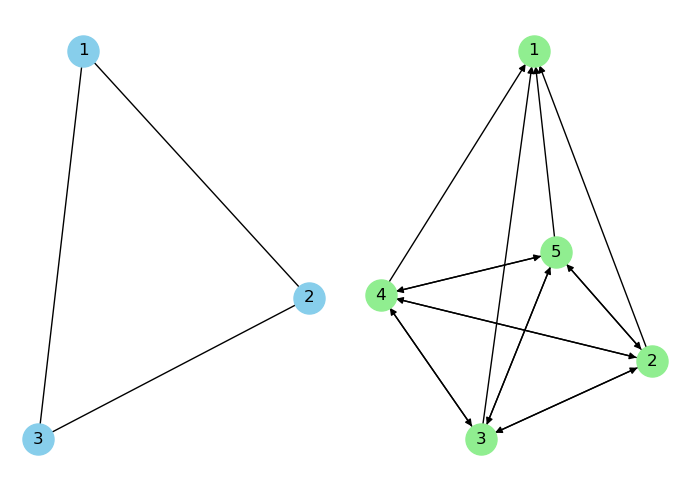

In [2]:
G = CyclicGroup(3)
G2 = CyclicGroup(5)
G1_no_dir = PowerGraph(G, directed=False)
G2_dir = PowerGraph(G2, directed=True)
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

G1_no_dir.draw(
    ax=axes[0],
    title="",
    node_color="skyblue",
    node_size=500, with_legend = False
)

G2_dir.draw(
    ax=axes[1],
    title="",
    node_color="lightgreen",
    node_size=500, with_legend = False
)

plt.tight_layout()
plt.show()

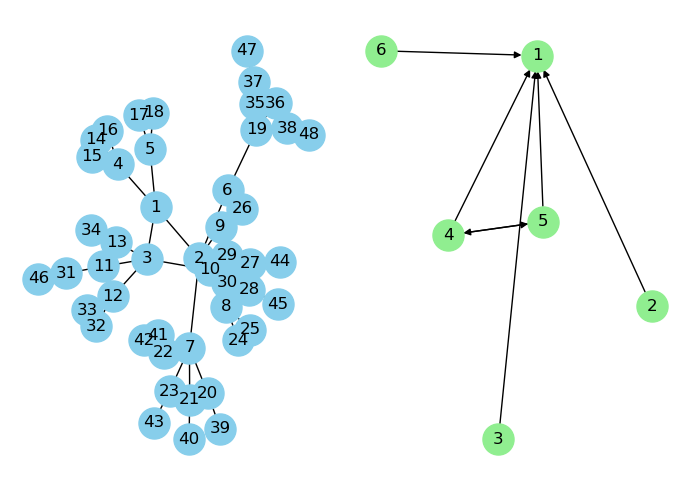

In [11]:
G = GLGroup(2,3)
G2 = GLGroup(2,2)
G1_no_dir = PowerGraph(G, directed=False)
G2_dir = PowerGraph(G2, directed=True)
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

G1_no_dir.draw(
    ax=axes[0],
    title="",
    node_color="skyblue",
    node_size=500, with_legend = False
)

G2_dir.draw(
    ax=axes[1],
    title="",
    node_color="lightgreen",
    node_size=500, with_legend = False
)

plt.tight_layout()
plt.show()

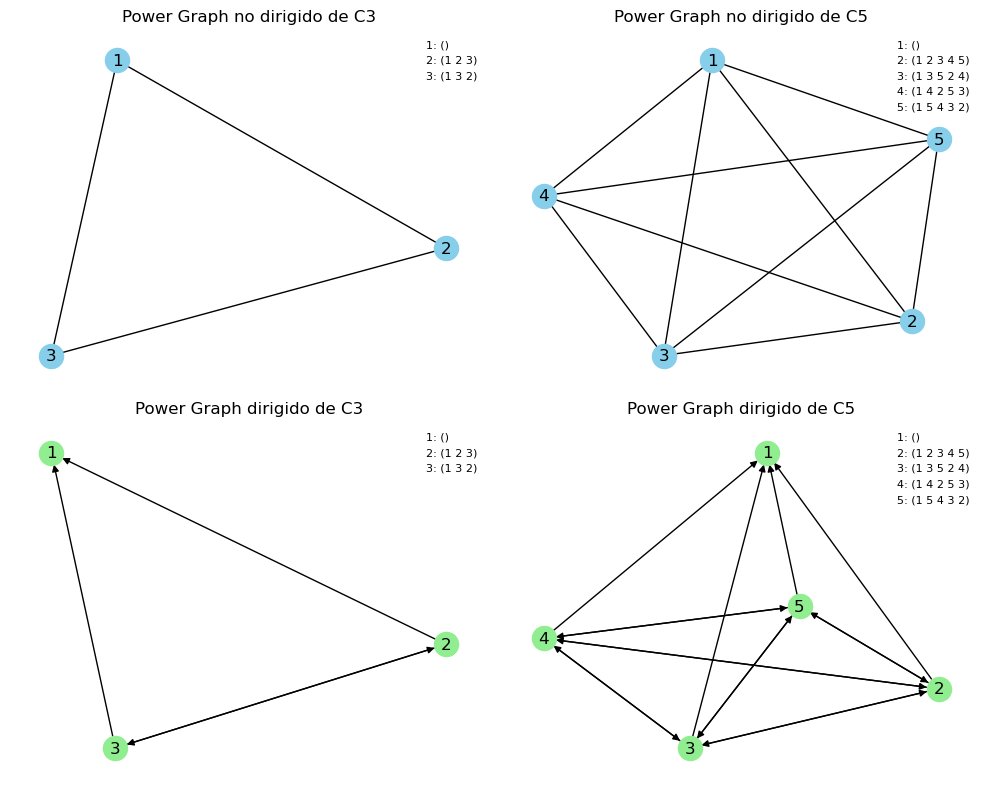

In [6]:
orders = [3, 5]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for idx, n in enumerate(orders):
    G = CyclicGroup(n)
    graph = PowerGraph(G, directed=False)
    graph.draw(ax=axes[0, idx],
               title=f"Power Graph no dirigido de C{n}",
               node_color="skyblue",
               node_size=300)
    
for idx, n in enumerate(orders):
    G = CyclicGroup(n)
    graph = PowerGraph(G, directed=True)
    graph.draw(ax=axes[1, idx],
               title=f"Power Graph dirigido de C{n}",
               node_color="lightgreen",
               node_size=300)

plt.tight_layout()
plt.show()

Una de las ventajas de emplear **`NetworkX`** es que, tras construir los grafos, podemos analizarlos de manera sencilla y sistemática. Esto incluye calcular el número de nodos y aristas, verificar si el grafo es conexo, determinar los grados máximos y mínimos de los vértices, y obtener otras métricas relevantes que permiten caracterizar la estructura de los power graphs y compararlos entre distintos grupos.

In [5]:
G = CyclicGroup(5)
G2 = CyclicGroup(4)

In [6]:
G2.print_elements()

1: e
2: g^1
3: g^2
4: g^3


In [7]:
graph1 = PowerGraph(G, directed = False)
graph2 = PowerGraph(G2, directed = False)

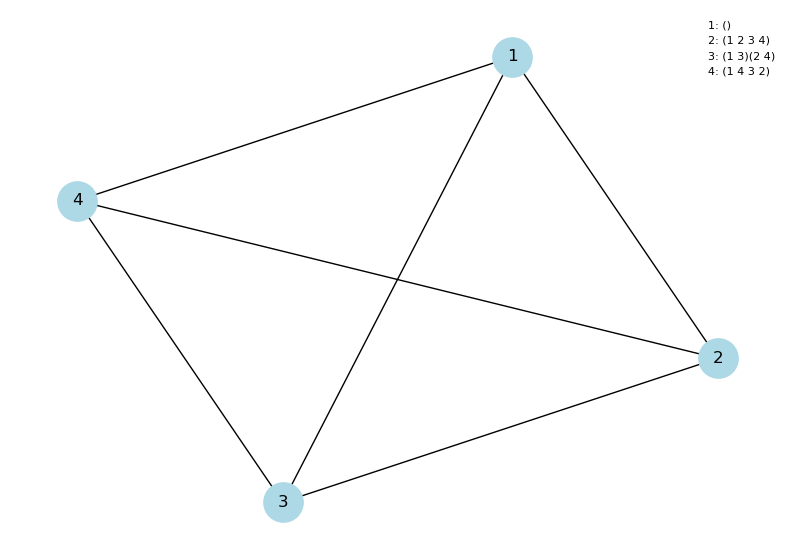

In [8]:
graph2.draw()

In [10]:
orders = [3, 5, 7, 11]
summary_data = []

# Grafo no dirigido
for n in orders:
    G = CyclicGroup(n)
    graph = PowerGraph(G, directed=False)
    summary = graph.summarize()
    summary_data.append({
        "Grupo": f"C{n}",
        "Tipo": "No dirigido",
        "Nodos": summary["summary"]["Nodos"].iloc[0],
        "Aristas": summary["summary"]["Aristas"].iloc[0],
        "Partes conexas": summary["summary"]["Partes conexas"].iloc[0],
        "Grado máximo": summary["summary"]["Grado máximo"].iloc[0],
        "Grado mínimo": summary["summary"]["Grado mínimo"].iloc[0]
    })

# Grafo dirigido
for n in orders:
    G = CyclicGroup(n)
    graph = PowerGraph(G, directed=True)
    summary = graph.summarize()
    summary_data.append({
        "Grupo": f"C{n}",
        "Tipo": "Dirigido",
        "Nodos": summary["summary"]["Nodos"].iloc[0],
        "Aristas": summary["summary"]["Aristas"].iloc[0],
        "Partes conexas": summary["summary"]["Partes conexas"].iloc[0],
        "Grado máximo": summary["summary"]["Grado máximo"].iloc[0],
        "Grado mínimo": summary["summary"]["Grado mínimo"].iloc[0]
    })

df_summary = pd.DataFrame(summary_data)
df_summary

,Grupo,Tipo,Nodos,Aristas,Partes conexas,Grado máximo,Grado mínimo
0,C3,No dirigido,3,3,1,2,2
1,C5,No dirigido,5,10,1,4,4
2,C7,No dirigido,7,21,1,6,6
3,C11,No dirigido,11,55,1,10,10
4,C3,Dirigido,3,4,1,3,2
5,C5,Dirigido,5,16,1,7,4
6,C7,Dirigido,7,36,1,11,6
7,C11,Dirigido,11,100,1,19,10


Para visualizar los **power graphs** de los grupos $GL$, basta con instanciar el tipo de grupo deseado. Sin embargo, se debe tener cuidado con los límites de memoria: aunque en principio se pueden crear los grupos sin problemas, la construcción de los grafos requiere **generar todo el espacio de elementos** para determinar las aristas y nodos.

Es probable que softwares especializados como **SageMath** o **GAP** implementen procesos dinámicos que permitan trabajar con grupos más grandes de manera eficiente. En este laboratorio, para evitar problemas de memoria y mantener los cálculos manejables, se **limitó el análisis a matrices de dimensión 2** variando únicamente el módulo entre 2 y 3.

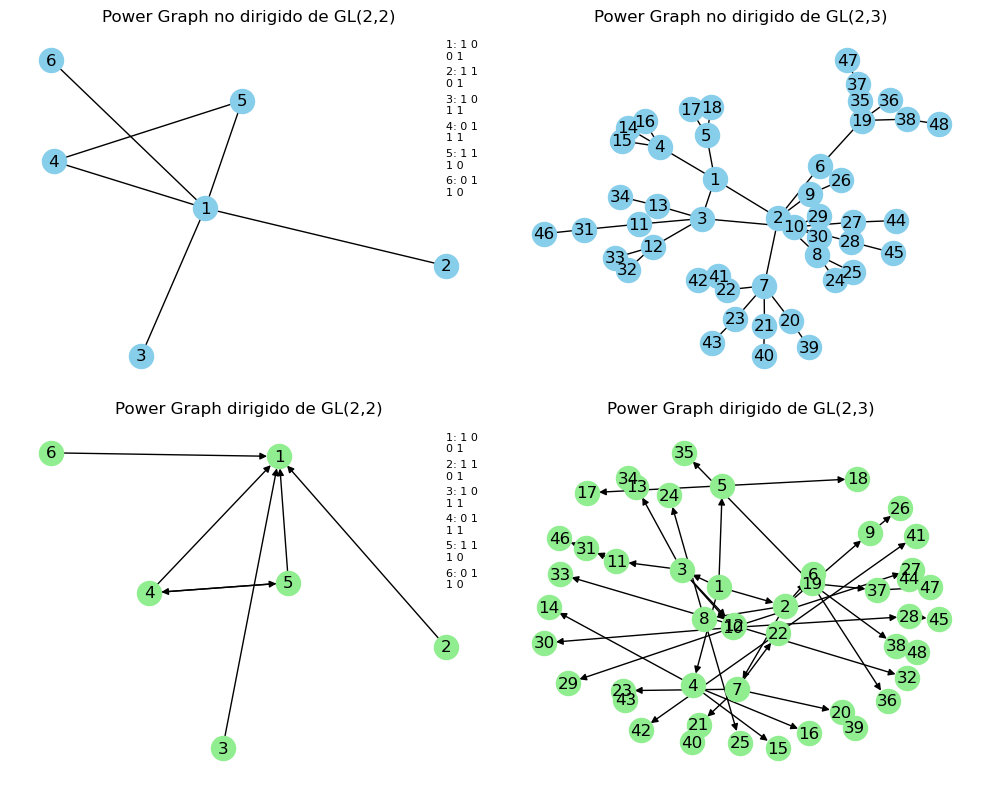

In [5]:
mods = [2, 3]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Fila superior: power graphs no dirigidos
for idx, p in enumerate(mods):
    GL = GLGroup(2, p)
    graph = PowerGraph(GL, directed=False)
    graph.draw(ax=axes[0, idx],
               title=f"Power Graph no dirigido de GL(2,{p})",
               node_color="skyblue",
               node_size=300)

# Fila inferior: power graphs dirigidos
for idx, p in enumerate(mods):
    GL = GLGroup(2, p)
    graph = PowerGraph(GL, directed=True)
    graph.draw(ax=axes[1, idx],
               title=f"Power Graph dirigido de GL(2,{p})",
               node_color="lightgreen",
               node_size=300)

plt.tight_layout()
plt.show()

Se observa que el grafo de $GL(2,3)$ ya es más intrincado y difícil de visualizar en pantalla, dado que cuenta con 48 nodos. A continuación, se instanciarán matrices de dimensión 3; sin embargo, nos limitaremos únicamente a **examinar sus métricas resumen** debido al tamaño del grafo.

In [4]:
dims = [2, 3]
mods = [2, 3]

summary_data = []

for n in dims:
    for p in mods:
        GL = GLGroup(n, p)
        for directed in [False, True]:
            graph = PowerGraph(GL, directed=directed)
            summary = graph.summarize()
            summary_data.append({
                "Grupo": f"GL({n},{p})",
                "Dimensión": n,
                "Módulo": p,
                "Tipo": "Dirigido" if directed else "No dirigido",
                "Nodos": summary["summary"]["Nodos"].iloc[0],
                "Aristas": summary["summary"]["Aristas"].iloc[0],
                "Partes conexas": summary["summary"]["Partes conexas"].iloc[0],
                "Grado máximo": summary["summary"]["Grado máximo"].iloc[0],
                "Grado mínimo": summary["summary"]["Grado mínimo"].iloc[0]
            })

df_summary = pd.DataFrame(summary_data)
df_summary

,Grupo,Dimensión,Módulo,Tipo,Nodos,Aristas,Partes conexas,Grado máximo,Grado mínimo
0,"GL(2,2)",2,2,No dirigido,6,6,1,5,1
1,"GL(2,2)",2,2,Dirigido,6,7,1,5,1
2,"GL(2,3)",2,3,No dirigido,48,47,1,5,1
3,"GL(2,3)",2,3,Dirigido,48,47,1,5,1
4,"GL(3,2)",3,2,No dirigido,168,167,1,6,1
5,"GL(3,2)",3,2,Dirigido,168,167,1,6,1
6,"GL(3,3)",3,3,No dirigido,11232,11231,1,10,1
7,"GL(3,3)",3,3,Dirigido,11232,11231,1,10,1


Finalmente, se presentará una forma alternativa de visualizar los grafos, especialmente útil cuando los grupos son grandes. Además de proporcionar **métricas de resumen**, el método `.summarize()` de la clase `PowerGraph` también retorna la **matriz de adyacencia** y la **matriz de incidencia** del grafo. Esto permite analizar las relaciones de potencia entre elementos de grupos grandes, como $C(50)$ o $GL(3,2)$, de manera más eficiente sin necesidad de dibujar el grafo completo.  

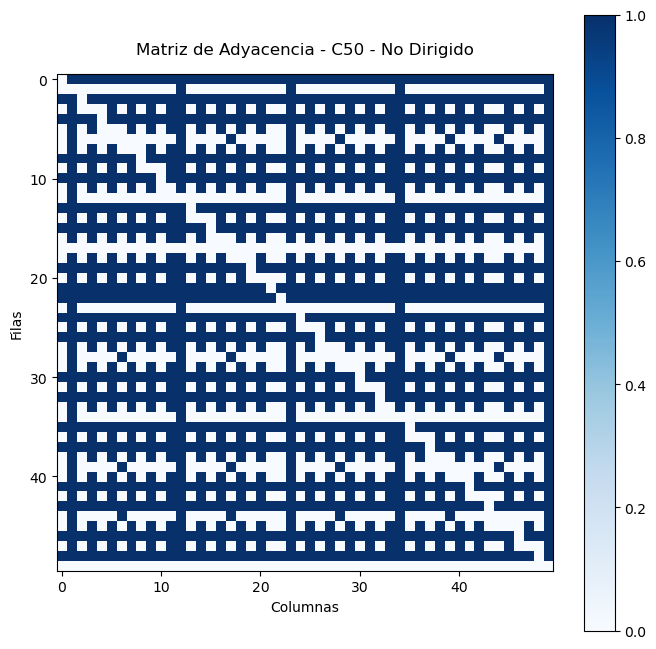

In [12]:
G = CyclicGroup(50)

# Construir su power graph (no dirigido)
graph = PowerGraph(G, directed=True)

# Obtener matriz de adyacencia
adjacency = graph.summarize()["adjacency_matrix"]

# Mostrar la matriz con imshow
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(adjacency, cmap="Blues", interpolation="none")
ax.set_title("Matriz de Adyacencia - C50 - No Dirigido", fontsize=12, pad=15)
ax.set_xlabel("Columnas", fontsize=10)
ax.set_ylabel("Filas", fontsize=10)

# Barra de color
cbar = fig.colorbar(im, ax=ax)
plt.show()

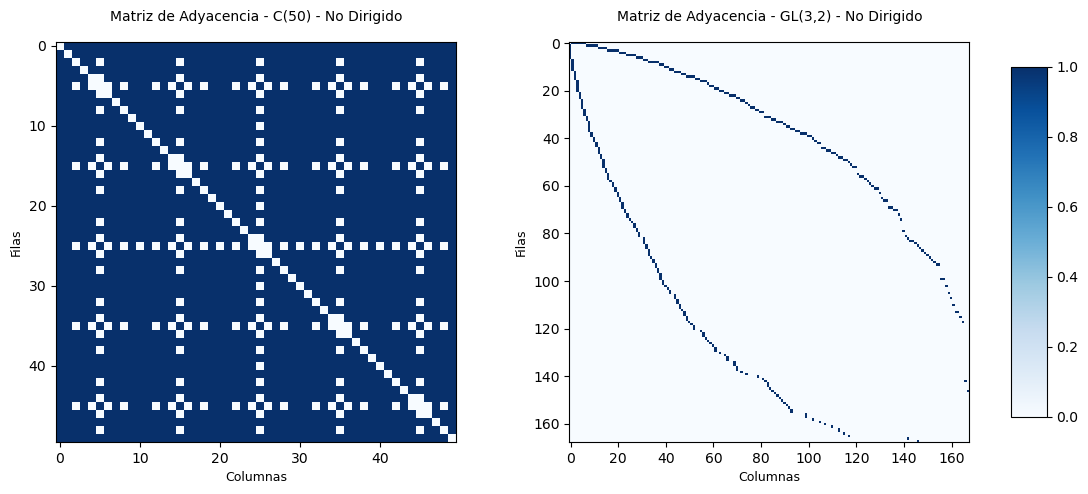

In [3]:
groups = [
    ("C(50)", CyclicGroup(50)),
    ("GL(3,2)", GLGroup(3,2))
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
images = []

for idx, (name, G) in enumerate(groups):
    graph = PowerGraph(G, directed=False)
    summary = graph.summarize()
    
    adjacency = summary["adjacency_matrix"]
    
    im = axes[idx].imshow(adjacency, cmap="Blues", interpolation="none")
    axes[idx].set_title(f"Matriz de Adyacencia - {name} - No Dirigido", fontsize=10, pad=15)
    axes[idx].set_xlabel("Columnas", fontsize=9)
    axes[idx].set_ylabel("Filas", fontsize=9)
    
    images.append(im)

plt.subplots_adjust(left=0.05, right=0.82, wspace=0.25, top=0.9, bottom=0.1)

cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(images[0], cax=cbar_ax)

plt.show()

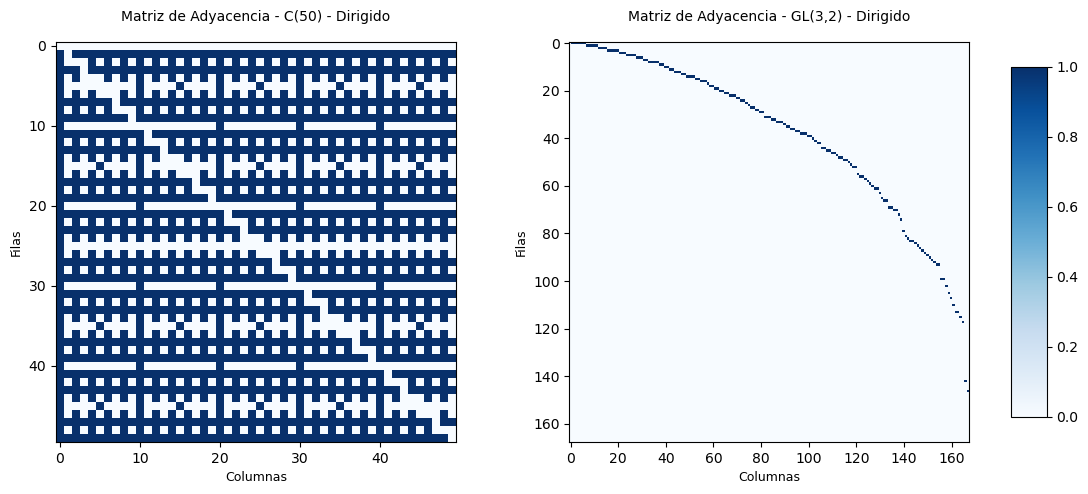

In [4]:
groups = [
    ("C(50)", CyclicGroup(50)),
    ("GL(3,2)", GLGroup(3,2))
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
images = []

for idx, (name, G) in enumerate(groups):
    graph = PowerGraph(G, directed=True)
    summary = graph.summarize()
    
    adjacency = summary["adjacency_matrix"]
    
    im = axes[idx].imshow(adjacency, cmap="Blues", interpolation="none")
    axes[idx].set_title(f"Matriz de Adyacencia - {name} - Dirigido", fontsize=10, pad=15)  # <- pad ajustado
    axes[idx].set_xlabel("Columnas", fontsize=9)
    axes[idx].set_ylabel("Filas", fontsize=9)
    
    images.append(im)

plt.subplots_adjust(left=0.05, right=0.82, wspace=0.25, top=0.9, bottom=0.1)

cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(images[0], cax=cbar_ax)

plt.show()

## Referencias

- Hungerford, T. W. (1974). *Algebra*. Springer.
- Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). *Introduction to Algorithms* (3rd ed.). MIT Press.